In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
import tensorflow_addons as tfa

# Load an image from file
img = tf.io.read_file('sample003.jpg')
img = tf.image.decode_jpeg(img, channels=3)

# Convert the image to grayscale
gray = tf.image.rgb_to_grayscale(img)

# Apply a binary threshold to the grayscale image
thresh = tf.where(gray < 100, 0, 255)

# Find connected components in the binary image using TensorFlow Addons
labels = tfa.image.connected_components(thresh)



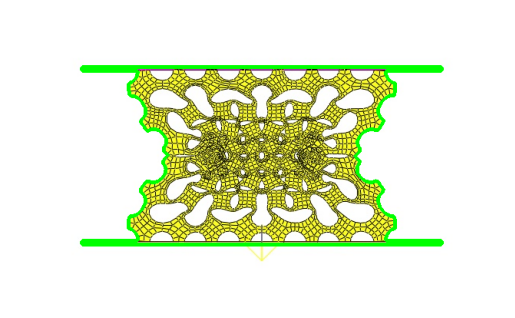

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image from file
img = cv2.imread('sample003.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection to the smoothed image
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edge image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the outermost contour on the original image
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

# Display the original image with the outermost contour
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [12]:
import cv2
import numpy as np

# Load an image from file
img = cv2.imread('sample003.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection to the smoothed image
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edge image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask of the outermost contour
mask = np.zeros_like(gray)
cv2.drawContours(mask, contours, -1, 255, -1)

# Extract the portion of the original image within the mask
result = cv2.bitwise_and(img, img, mask=mask)

# Save the extracted image to a file
cv2.imwrite('result.jpg', result)

True

In [13]:
import cv2
import numpy as np

# Load an image from file
img = cv2.imread('sample003.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection to the smoothed image
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edge image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a black and white image with the outermost contour
mask = np.zeros_like(gray)
cv2.drawContours(mask, contours, -1, 255, 3)

# Save the black and white image with the outermost edges to a file
cv2.imwrite('edges.jpg', mask)


True

In [14]:
import cv2
import numpy as np

# Load an image from file
img = cv2.imread('sample003.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection to the smoothed image
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edge image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a black and white image with the outermost contour
mask = np.zeros_like(gray)
cv2.drawContours(mask, contours, -1, 255, 3)

# Save the black and white image with the outermost edges to a file
cv2.imwrite('edges.jpg', mask)

True

In [17]:
import cv2
import numpy as np

# Load an image from file
img = cv2.imread('sample003.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection to the smoothed image
edges = cv2.Canny(blurred, 50, 150)

# Crop the image to remove any overlapping regions
row_sum = np.sum(edges, axis=1)
nonzero_rows = np.where(row_sum > 0)[0]
top, bottom = nonzero_rows[0], nonzero_rows[-1]
cropped = edges[top:bottom, :]

# Find contours in the cropped image
contours, hierarchy = cv2.findContours(cropped, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a black and white image with the outermost contour
mask = np.zeros_like(cropped)
cv2.drawContours(mask, contours, -1, 255, 3)

# Create a black and white image with the outermost contour on the original image size
h, w = cropped.shape
edges = np.zeros_like(gray)
edges[top:top+h, :] = mask

# Save the black and white image with the outermost edges to a file
cv2.imwrite('edges2.jpg', edges)

True

In [18]:
import cv2
import numpy as np

# Load an image from file
img = cv2.imread('sample003.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection to the smoothed image
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edge image with the RETR_EXTERNAL flag
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a black and white image with the outermost contour
mask = np.zeros_like(gray)
cv2.drawContours(mask, contours, -1, 255, 3)

# Crop the image to remove any overlapping regions
row_sum = np.sum(mask, axis=1)
nonzero_rows = np.where(row_sum > 0)[0]
top, bottom = nonzero_rows[0], nonzero_rows[-1]
cropped = mask[top:bottom, :]

# Create a black and white image with the outermost contour on the original image size
h, w = cropped.shape
edges = np.zeros_like(gray)
edges[top:top+h, :] = cropped

# Save the black and white image with the outermost edges to a file
cv2.imwrite('edges003.jpg', edges)


True

In [19]:
import cv2
import numpy as np

# Load an image from file
img = cv2.imread('sample003.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection to the smoothed image
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edge image with the RETR_EXTERNAL flag
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the outermost contour
largest_contour = max(contours, key=cv2.contourArea)

# Find the minimum area bounding box for the outermost contour
rect = cv2.minAreaRect(largest_contour)

# Determine the angle of rotation to straighten the image
angle = rect[2]
if angle < -45:
    angle = 90 + angle
else:
    angle = angle

# Rotate the image to align the object with the image axes
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# Convert the rotated image to grayscale
gray_rotated = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the rotated grayscale image
blurred_rotated = cv2.GaussianBlur(gray_rotated, (5, 5), 0)

# Apply Canny edge detection to the smoothed image
edges_rotated = cv2.Canny(blurred_rotated, 50, 150)

# Find contours in the rotated edge image with the RETR_EXTERNAL flag
contours_rotated, hierarchy_rotated = cv2.findContours(edges_rotated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a black and white image with the outermost contour
mask = np.zeros_like(gray_rotated)
cv2.drawContours(mask, contours_rotated, -1, 255, 3)

# Crop the image to remove any overlapping regions
row_sum = np.sum(mask, axis=1)
nonzero_rows = np.where(row_sum > 0)[0]
top, bottom = nonzero_rows[0], nonzero_rows[-1]
cropped = mask[top:bottom, :]

# Create a black and white image with the outermost contour on the original image size
h, w = cropped.shape
edges = np.zeros_like(gray)
edges_rotated = cv2.resize(cropped, (w, h))
edges[top:top+h, :] = edges_rotated

# Save the black and white image with the outermost edges to a file
cv2.imwrite('edges004.jpg', edges)


True

In [20]:
import cv2
import numpy as np
from cv2.ximgproc import thinning

# Load an image from file
img = cv2.imread('sample003.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection to the smoothed image
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edge image with the RETR_EXTERNAL flag
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a black and white image with the outermost contour
mask = np.zeros_like(gray)
cv2.drawContours(mask, contours, -1, 255, 3)

# Thin the edges to a single pixel width
thinned = thinning(mask, thinningType=cv2.ximgproc.THINNING_GUOHALL)

# Crop the image to remove any overlapping regions
row_sum = np.sum(thinned, axis=1)
nonzero_rows = np.where(row_sum > 0)[0]
top, bottom = nonzero_rows[0], nonzero_rows[-1]
cropped = thinned[top:bottom, :]

# Create a black and white image with the outermost contour on the original image size
h, w = cropped.shape
edges = np.zeros_like(gray)
edges[top:top+h, :] = cropped

# Save the black and white image with the outermost edges to a file
cv2.imwrite('edges005.jpg', edges)


True

In [34]:
import cv2
import numpy as np
from cv2.ximgproc import thinning

# Load an image from file
img = cv2.imread('sample003.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection to the smoothed image
edges = cv2.Canny(blurred, 50, 150)

# Find the rows of the image that contain edges
edge_coords = cv2.findNonZero(edges)
min_row = np.min(edge_coords[:, 0, 1])
max_row = np.max(edge_coords[:, 0, 1])

# Create a mask with a value of 1 for the rows that contain edges and a value of 0 for all other rows
mask = np.zeros_like(gray)
mask[min_row:max_row+1, :] = 1

# Create a black and white image with the outermost contour
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
outer_contour = max(contours, key=cv2.contourArea)
mask_contour = np.zeros_like(gray)
cv2.drawContours(mask_contour, [outer_contour], 0, 255, 3)

# Apply thinning to the edges using the mask
thinned = np.zeros_like(gray)
thinned[min_row:max_row+1, :] = thinning(mask_contour[min_row:max_row+1, :], thinningType=cv2.ximgproc.THINNING_GUOHALL)

# Crop the image to remove any overlapping regions
row_sum = np.sum(thinned, axis=1)
nonzero_rows = np.where(row_sum > 0)[0]
top, bottom = nonzero_rows[0], nonzero_rows[-1]
cropped = thinned[top:bottom, :]

# Create a black and white image with the outermost contour on the original image size
h, w = cropped.shape
edges = np.zeros_like(gray)
edges[top:top+h, :] = cropped

# Save the black and white image with the outermost edges to a file
cv2.imwrite('final.jpg', edges)


True

In [28]:
import cv2
import numpy as np
from cv2.ximgproc import thinning

# Load an image from file
img = cv2.imread('sample003.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection to the smoothed image
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edge image with the RETR_EXTERNAL flag
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a black and white image with the outermost contour
mask = np.zeros_like(gray)
cv2.drawContours(mask, contours, -1, 255, 3)

# Thin the edges to a single pixel width in the top and bottom regions
thinned = thinning(mask, thinningType=cv2.ximgproc.THINNING_GUOHALL)
h, w = thinned.shape
for i in range(w):
    if thinned[0, i] == 255:
        thinned[0, i] = 0
    if thinned[h-1, i] == 255:
        thinned[h-1, i] = 0

# Crop the image to remove any overlapping regions
row_sum = np.sum(thinned, axis=1)
nonzero_rows = np.where(row_sum > 0)[0]
top, bottom = nonzero_rows[0], nonzero_rows[-1]
cropped = thinned[top:bottom, :]

# Create a black and white image with the outermost contour on the original image size
h, w = cropped.shape
edges = np.zeros_like(gray)
edges[top:top+h, :] = cropped

# Save the black and white image with the outermost edges to a file
cv2.imwrite('edges007.jpg', edges)


True

In [29]:
import cv2
import numpy as np
from cv2.ximgproc import thinning

# Load an image from file
img = cv2.imread('sample003.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection to the smoothed image
edges = cv2.Canny(blurred, 50, 150)

# Find the rows of the image that contain edges
edge_coords = cv2.findNonZero(edges)
min_row = np.min(edge_coords[:, 0, 1])
max_row = np.max(edge_coords[:, 0, 1])

# Create a mask with a value of 1 for the rows that contain edges and a value of 0 for all other rows
mask = np.zeros_like(gray)
mask[min_row:max_row+1, :] = 1

# Create a black and white image with the outermost contour
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
outer_contour = max(contours, key=cv2.contourArea)
mask_contour = np.zeros_like(gray)b
cv2.drawContours(mask_contour, [outer_contour], 0, 255, 3)

# Thin the edges to a single pixel width in the top and bottom regions
thinned = thinning(mask_contour, mask=min_row==0|mask_contour==255, thinningType=cv2.ximgproc.THINNING_GUOHALL)

# Crop the image to remove any overlapping regions
row_sum = np.sum(thinned, axis=1)
nonzero_rows = np.where(row_sum > 0)[0]
top, bottom = nonzero_rows[0], nonzero_rows[-1]
cropped = thinned[top:bottom, :]

# Create a black and white image with the outermost contour on the original image size
h, w = cropped.shape
edges = np.zeros_like(gray)
edges[top:top+h, :] = cropped

# Save the black and white image with the outermost edges to a file
cv2.imwrite('edges008.jpg', edges)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [31]:
import cv2
import numpy as np
from cv2.ximgproc import thinning

# Load an image from file
img = cv2.imread('sample003.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection to the smoothed image
edges = cv2.Canny(blurred, 50, 150)

# Find the rows of the image that contain edges
edge_coords = cv2.findNonZero(edges)
min_row = np.min(edge_coords[:, 0, 1])
max_row = np.max(edge_coords[:, 0, 1])

# Create a mask with a value of 1 for the rows that contain edges and a value of 0 for all other rows
mask = np.zeros_like(gray)
mask[min_row:max_row+1, :] = 1

# Create a black and white image with the outermost contour
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
outer_contour = max(contours, key=cv2.contourArea)
mask_contour = np.zeros_like(gray)
cv2.drawContours(mask_contour, [outer_contour], 0, 255, 3)

# Create a mask for applying thinning to only the top and bottom regions of the image
mask_thin = np.zeros_like(gray, dtype=bool)
mask_thin[:2, :] = True
mask_thin[-2:, :] = True
mask_thin[min_row:max_row+1, :] |= mask_contour[min_row:max_row+1, :] == 255

# Thin the edges to a single pixel width in the top and bottom regions
thinned = thinning(mask_contour, mask=mask_thin, thinningType=cv2.ximgproc.THINNING_GUOHALL)

# Crop the image to remove any overlapping regions
row_sum = np.sum(thinned, axis=1)
nonzero_rows = np.where(row_sum > 0)[0]
top, bottom = nonzero_rows[0], nonzero_rows[-1]
cropped = thinned[top:bottom, :]

# Create a black and white image with the outermost contour on the original image size
h, w = cropped.shape
edges = np.zeros_like(gray)
edges[top:top+h, :] = cropped

# Save the black and white image with the outermost edges to a file
cv2.imwrite('edges009.jpg', edges)


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'thinning'
> Overload resolution failed:
>  - 'mask' is an invalid keyword argument for thinning()
>  - 'mask' is an invalid keyword argument for thinning()


In [32]:
import cv2
import numpy as np
from cv2.ximgproc import thinning

# Load an image from file
img = cv2.imread('sample003.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection to the smoothed image
edges = cv2.Canny(blurred, 50, 150)

# Find the rows of the image that contain edges
edge_coords = cv2.findNonZero(edges)
min_row = np.min(edge_coords[:, 0, 1])
max_row = np.max(edge_coords[:, 0, 1])

# Create a mask with a value of 1 for the rows that contain edges and a value of 0 for all other rows
mask = np.zeros_like(gray)
mask[min_row:max_row+1, :] = 1

# Create a black and white image with the outermost contour
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
outer_contour = max(contours, key=cv2.contourArea)
mask_contour = np.zeros_like(gray)
cv2.drawContours(mask_contour, [outer_contour], 0, 255, 3)

# Create a mask for applying thinning to only the top and bottom regions of the image
mask_thin = np.zeros_like(gray, dtype=np.uint8)
mask_thin[:2, :] = 1
mask_thin[-2:, :] = 1
mask_thin[min_row:max_row+1, :] |= mask_contour[min_row:max_row+1, :] == 255

# Thin the edges to a single pixel width in the top and bottom regions
thinned = thinning(mask_thin, thinningType=cv2.ximgproc.THINNING_GUOHALL)

# Crop the image to remove any overlapping regions
row_sum = np.sum(thinned, axis=1)
nonzero_rows = np.where(row_sum > 0)[0]
top, bottom = nonzero_rows[0], nonzero_rows[-1]
cropped = thinned[top:bottom, :]

# Create a black and white image with the outermost contour on the original image size
h, w = cropped.shape
edges = np.zeros_like(gray)
edges[top:top+h, :] = cropped

# Save the black and white image with the outermost edges to a file
cv2.imwrite('edges008.jpg', edges)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [33]:
import cv2
import numpy as np
from cv2.ximgproc import thinning

# Load an image from file
img = cv2.imread('sample003.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection to the smoothed image
edges = cv2.Canny(blurred, 50, 150)

# Find the rows of the image that contain edges
edge_coords = cv2.findNonZero(edges)
min_row = np.min(edge_coords[:, 0, 1])
max_row = np.max(edge_coords[:, 0, 1])

# Create a mask with a value of 1 for the rows that contain edges and a value of 0 for all other rows
mask = np.zeros_like(gray)
mask[min_row:max_row+1, :] = 1

# Create a black and white image with the outermost contour
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
outer_contour = max(contours, key=cv2.contourArea)
mask_contour = np.zeros_like(gray)
cv2.drawContours(mask_contour, [outer_contour], 0, 255, 3)

# Create a mask for applying thinning to only the top and bottom regions of the image
mask_thin = np.zeros_like(gray, dtype=np.uint8)
mask_thin[:2, :] = 1
mask_thin[-2:, :] = 1
mask_thin[min_row:max_row+1, :] |= mask_contour[min_row:max_row+1, :] == 255

# Thin the edges to a single pixel width in the top and bottom regions
thinned = thinning(mask_thin, thinningType=cv2.ximgproc.THINNING_GUOHALL)

# Crop the image to remove any overlapping regions
row_sum = np.sum(thinned, axis=1)
nonzero_rows = np.where(row_sum > 0)[0]
if nonzero_rows.size == 0:
    print('No edges detected in the top and bottom regions')
else:
    top, bottom = nonzero_rows[0], nonzero_rows[-1]
    cropped = thinned[top:bottom, :]

    # Create a black and white image with the outermost contour on the original image size
    h, w = cropped.shape
    edges = np.zeros_like(gray)
    edges[top:top+h, :] = cropped

    # Save the black and white image with the outermost edges to a file
    cv2.imwrite('edges008.jpg', edges)


No edges detected in the top and bottom regions


In [35]:
import cv2
import numpy as np
from cv2.ximgproc import thinning

# Load an image from file
img = cv2.imread('sample003.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection to the smoothed image
edges = cv2.Canny(blurred, 50, 150)

# Find the rows of the image that contain edges
edge_coords = cv2.findNonZero(edges)
min_row = np.min(edge_coords[:, 0, 1])
max_row = np.max(edge_coords[:, 0, 1])

# Create a mask with a value of 1 for the rows that contain edges and a value of 0 for all other rows
mask = np.zeros_like(gray)
mask[min_row:max_row+1, :] = 1

# Create a black and white image with the outermost contour
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
outer_contour = max(contours, key=cv2.contourArea)
mask_contour = np.zeros_like(gray)
cv2.drawContours(mask_contour, [outer_contour], 0, 255, 3)

# Apply thinning to the edges using the mask
thinned = np.zeros_like(gray)
thinned[min_row:max_row, :] = thinning(mask_contour[min_row:max_row, :], thinningType=cv2.ximgproc.THINNING_GUOHALL)

# Crop the image to remove any overlapping regions
row_sum = np.sum(thinned, axis=1)
nonzero_rows = np.where(row_sum > 0)[0]
top, bottom = nonzero_rows[0], nonzero_rows[-1]
cropped = thinned[top:bottom, :]

# Create a black and white image with the outermost contour on the original image size
h, w = cropped.shape
edges = np.zeros_like(gray)
edges[top:top+h, :] = cropped

# Save the black and white image with the outermost edges to a file
cv2.imwrite('final002.jpg', edges)


True